In [260]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
G = nx.read_gml("SI301_social_network.gml")

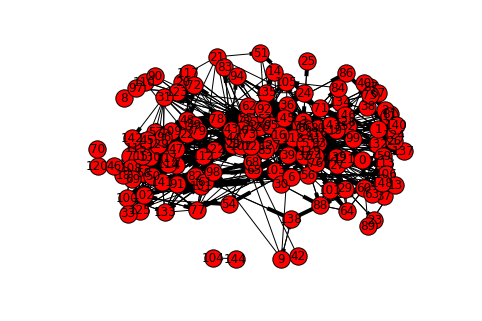

In [262]:
selfLoops = G.selfloop_edges()
selfLoops = G.remove_edges_from(selfLoops)
for node, degree in G.degree().items():
    if degree == 0:
        G.remove_node(node)
        
undirected = G.to_undirected(reciprocal = True)

nx.draw(G, with_labels=True)

In [263]:
print(nx.number_of_nodes(G))

146


In [264]:
#function to reset every behavior to A and every node to unseen

def behaviorSet(graph):
    nx.set_node_attributes(graph, 'behavior', 'A')
    nx.set_node_attributes(graph, 'seen', 'f')



In [265]:
#function to count the total number of nodes with behavior B
def getTotalChange(graph):
    counter = 0
    for node in graph.nodes(data= True ):
        if node[1]['behavior'] == 'B':
            counter += 1
            
    return counter 

In [266]:

def behaviorCascade(graph, threshold):
    #solution list to keep track of each seed node and their respective amount of nodes changed
    solution = []
    #for loop to test every node as the seed
    for node in graph.nodes(data= True ):
        behaviorSet(graph)                #reset the graph to have starting information
        searchNode = list(node)           
        numConverted = 0                  #initiliaze the number of nodes converted to 0
        searchNode[1]['behavior'] = 'B'   #set the current node we are looking at behavior to seen and B
        searchNode[1]['seen'] = 't'
        currentSearch = []                #list of nodes we are looking at
        currentSearch.append(searchNode)   #add the current node
        
        while not len(currentSearch) == 0:  #while there are still nodes to look at
            currNode = currentSearch.pop()
            totalA = 0
            totalB = 0
            currNode = tuple(currNode)
            graph.node[currNode[0]]['seen'] = 't'
            for neighbor in graph.neighbors(currNode[0]):    #for each of the nodes neighbors
                node=graph.node[neighbor]
                if node['seen'] == 'f':                     #if it hasnt been seen, add it to the search list
                    currentSearch.append((neighbor, node))
                    #node['seen'] == 't'
                if node['behavior'] == 'B':                #keep track of the number of each behavior types
                    totalB += 1
                else:
                    totalA += 1
                
            if not totalB == 0:
                if not totalA == 0:
                    if((totalB / float(totalA + totalB)) >= threshold):    #if the percentage is greater than
                        currNode[1]["behavior"] = 'B'                      #the threshold, change the behavior
                        for neighbors in graph.neighbors(currNode[0]):     #if you update a node, recheck the 
                            recheckNode=graph.node[neighbors]              #neighbors in case they now cascade
                            if recheckNode['seen'] == 't':
                                if recheckNode['behavior'] == 'A':
                                    recheckNode['seen'] = 'f'
                                    currentSearch.append((neighbor, recheckNode))
                                   
        
        numConverted = getTotalChange(graph)          #calculate the total number of nodes and add them to the list
        #print(node)
        solution.append([numConverted, searchNode[0]])
        
    
    print("solution list")
    print((solution))
    print("max")
    print(max(solution))
              

In [267]:
behaviorCascade(G, .3)

solution list
[[1, u'133'], [1, u'132'], [3, u'131'], [1, u'130'], [1, u'137'], [2, u'136'], [1, u'135'], [8, u'134'], [1, u'139'], [1, u'138'], [2, u'24'], [1, u'25'], [1, u'26'], [1, u'27'], [1, u'20'], [1, u'21'], [1, u'22'], [1, u'23'], [1, u'28'], [1, u'29'], [2, u'0'], [1, u'4'], [1, u'8'], [1, u'120'], [1, u'121'], [1, u'122'], [5, u'123'], [1, u'124'], [1, u'125'], [1, u'126'], [2, u'127'], [2, u'128'], [1, u'129'], [1, u'118'], [9, u'59'], [2, u'58'], [1, u'55'], [1, u'54'], [1, u'57'], [1, u'56'], [1, u'51'], [1, u'50'], [3, u'53'], [1, u'52'], [1, u'115'], [1, u'114'], [1, u'117'], [2, u'116'], [5, u'110'], [1, u'113'], [2, u'112'], [2, u'82'], [1, u'83'], [2, u'80'], [7, u'81'], [1, u'86'], [9, u'87'], [1, u'84'], [1, u'85'], [2, u'3'], [1, u'7'], [1, u'108'], [1, u'109'], [2, u'102'], [1, u'103'], [1, u'100'], [1, u'101'], [2, u'106'], [1, u'107'], [1, u'104'], [2, u'105'], [1, u'39'], [1, u'38'], [1, u'33'], [2, u'32'], [1, u'31'], [1, u'30'], [1, u'37'], [2, u'36'], [2, 